In [33]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import confusion_matrix
import seaborn as sns 

In [34]:
datheard = pd.read_excel('D:/cours IFI/Fouille_Donees/dataset/archive1/heart_excel.xlsx')
datheard

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [35]:
datheard.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [36]:
#TRAITEMENT DE DONNEES
#VALEURS MANQUANTES
#compter les nombre de zéro dans cholesterol
nb_zeros=(datheard['Cholesterol']== 0).sum()
print (f"Nombre de zeros dans la colonne 'chlesterol': {nb_zeros}")

Nombre de zeros dans la colonne 'chlesterol': 172


In [37]:
#Remplacer les zéros par nAN ou null
datheard['Cholesterol']=datheard['Cholesterol'].replace(0, np.nan)
print(datheard['Cholesterol'].head())
nb_zeros=(datheard['Cholesterol']== 0).sum()
print(nb_zeros)
 #

0    289.0
1    180.0
2    283.0
3    214.0
4    195.0
Name: Cholesterol, dtype: float64
0


In [38]:
print(datheard.isnull().sum())

Age                 0
Sex                 0
ChestPainType       0
RestingBP           0
Cholesterol       172
FastingBS           0
RestingECG          0
MaxHR               0
ExerciseAngina      0
Oldpeak             0
ST_Slope            0
HeartDisease        0
dtype: int64


In [39]:
#Remplacer la valeur null par la moyenne
moyenne=datheard['Cholesterol'].mean()
datheard['Cholesterol']=datheard['Cholesterol'].fillna(moyenne)
print(datheard.isnull().sum())


Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64


In [40]:
#ANALYSE EXPLORATOIRE
datheard.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,244.635389,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,53.318029,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,85.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,214.000000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,244.635389,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [41]:
#datheard.HeartDisease.value_counts()
datheard.HeartDisease.value_counts(normalize=True).round(4).mul(100)

#datheard.HeartDisease.value_counts()



HeartDisease
1    55.34
0    44.66
Name: proportion, dtype: float64

C:\Users\hermanhk\AppData\Local\Temp\ipykernel_7584\3534202794.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='HeartDisease', data=datheard, palette=['skyblue', 'salmon'])


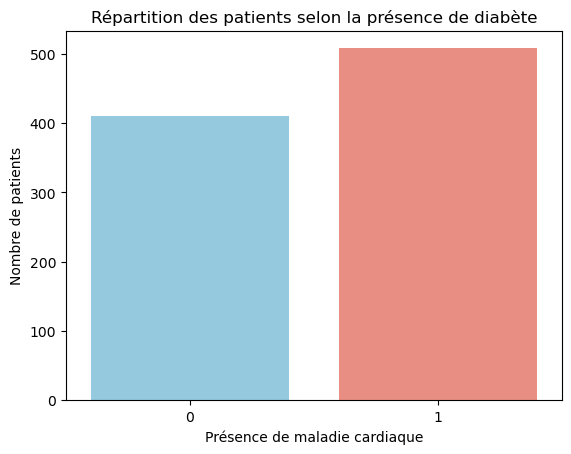

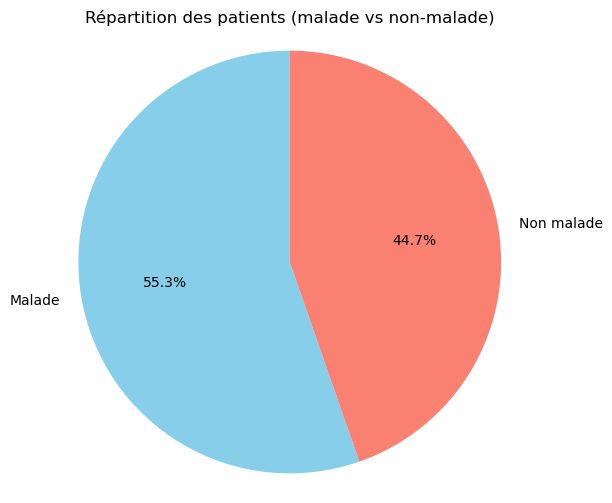

In [42]:
#sns.countplot(x='HeartDisease', data=datheard)

sns.countplot(x='HeartDisease', data=datheard, palette=['skyblue', 'salmon'])
plt.title("Répartition des patients selon la présence de diabète")
plt.xlabel("Présence de maladie cardiaque")
plt.ylabel("Nombre de patients")
plt.show()


# Comptage des classes 0 et 1
counts = datheard['HeartDisease'].value_counts()
labels = counts.index.map({0: 'Non malade', 1: 'Malade'})
colors = ['skyblue', 'salmon']

# Création du camembert
plt.figure(figsize=(6, 6))
plt.pie(counts, labels=labels, autopct='%1.1f%%', colors=colors, startangle=90)
plt.title("Répartition des patients (malade vs non-malade)")
plt.axis('equal')  # Cercle parfait
plt.show()




ANALYSE BI VARIEE

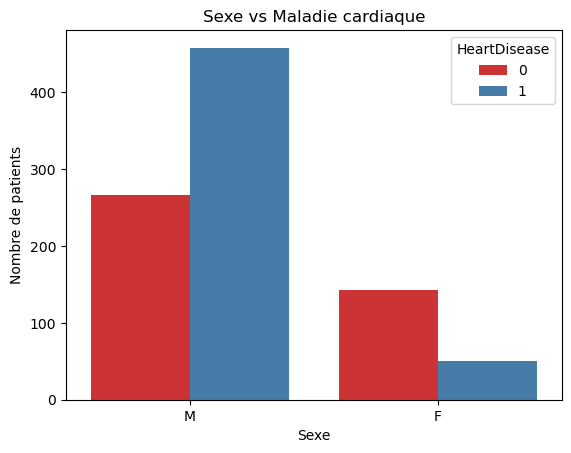

C:\Users\hermanhk\AppData\Local\Temp\ipykernel_7584\4116710452.py:21: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title="HeartDisease")


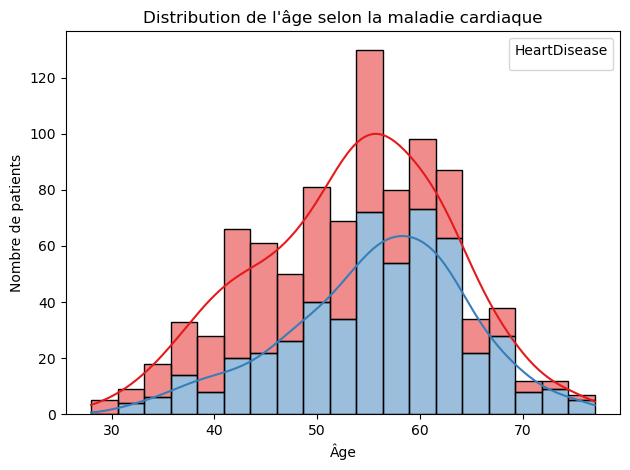

C:\Users\hermanhk\AppData\Local\Temp\ipykernel_7584\4116710452.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='HeartDisease', y='Age', data=datheard, palette='Set2')


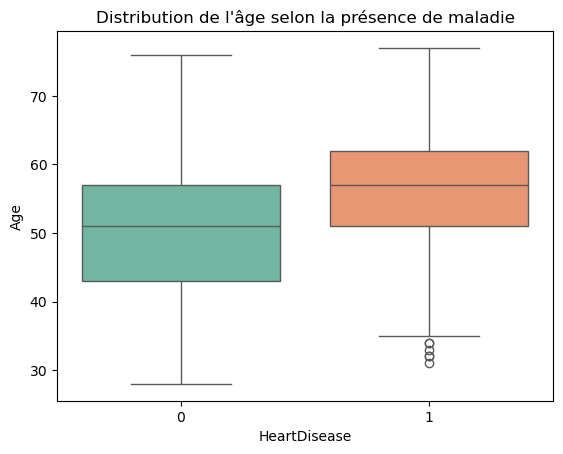

In [ ]:
sns.countplot(x='Sex', hue='HeartDisease', data=datheard, palette='Set1')
plt.title("Sexe vs Maladie cardiaque")
plt.xlabel("Sexe")
plt.ylabel("Nombre de patients")
plt.legend(title="HeartDisease")
plt.show()



# Filtrer uniquement les patients malades

#sns.histplot(x='Age', data=datheard)
#plt.show()



sns.histplot(x='Age', hue='HeartDisease', data=datheard, multiple='stack', palette='Set1', kde=True)
plt.title("Distribution de l'âge selon la maladie cardiaque")
plt.xlabel("Âge")
plt.ylabel("Nombre de patients")
plt.legend(title="HeartDisease")
plt.tight_layout()
plt.show()


sns.boxplot(x='HeartDisease', y='Age', data=datheard, palette='Set2')
plt.title("Distribution de l'âge selon la présence de maladie")
plt.xlabel("HeartDisease")
plt.ylabel("Age")
plt.show()

import seaborn as sns
import matplotlib.pyplot as plt



C:\Users\hermanhk\AppData\Local\Temp\ipykernel_7584\316404072.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='HeartDisease', data=datheard, palette=['skyblue', 'salmon'])


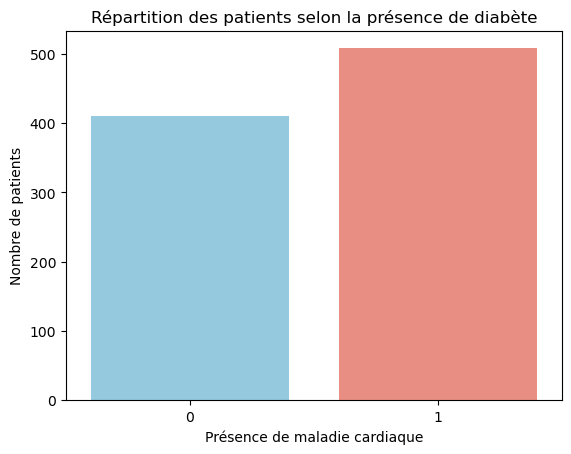

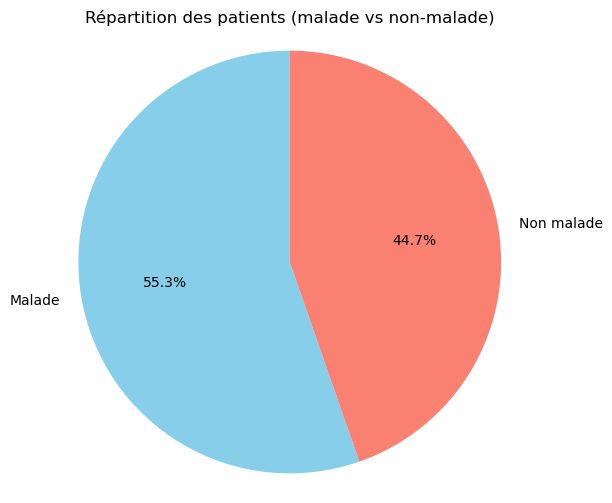

In [44]:
#sns.countplot(x='HeartDisease', data=datheard)

sns.countplot(x='HeartDisease', data=datheard, palette=['skyblue', 'salmon'])
plt.title("Répartition des patients selon la présence de diabète")
plt.xlabel("Présence de maladie cardiaque")
plt.ylabel("Nombre de patients")
plt.show()


# Comptage des classes 0 et 1
counts = datheard['HeartDisease'].value_counts()
labels = counts.index.map({0: 'Non malade', 1: 'Malade'})
colors = ['skyblue', 'salmon']

# Création du camembert
plt.figure(figsize=(6, 6))
plt.pie(counts, labels=labels, autopct='%1.1f%%', colors=colors, startangle=90)
plt.title("Répartition des patients (malade vs non-malade)")
plt.axis('equal')  # Cercle parfait
plt.show()

C:\Users\hermanhk\AppData\Local\Temp\ipykernel_7584\3602236178.py:5: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title="HeartDisease")


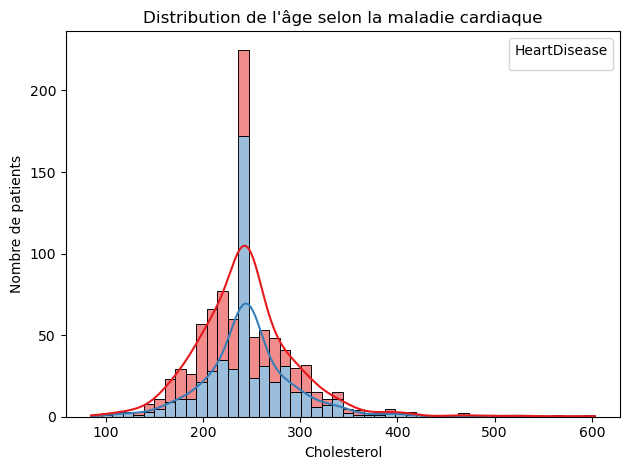

C:\Users\hermanhk\AppData\Local\Temp\ipykernel_7584\3602236178.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='HeartDisease', y='Cholesterol', data=datheard, palette='Set2')


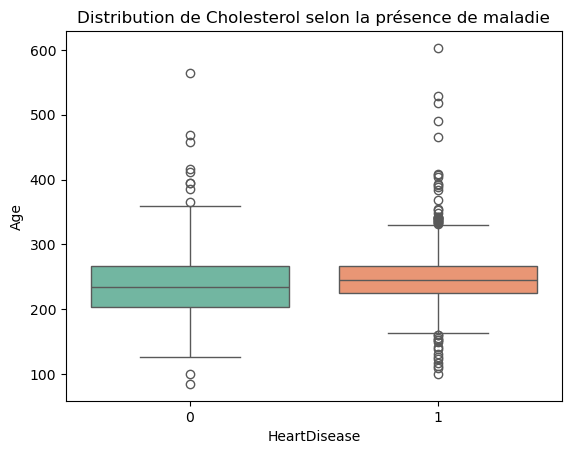

In [45]:
sns.histplot(x='Cholesterol', hue='HeartDisease', data=datheard, multiple='stack', palette='Set1', kde=True)
plt.title("Distribution de l'âge selon la maladie cardiaque")
plt.xlabel("Cholesterol")
plt.ylabel("Nombre de patients")
plt.legend(title="HeartDisease")
plt.tight_layout()
plt.show()


sns.boxplot(x='HeartDisease', y='Cholesterol', data=datheard, palette='Set2')
plt.title("Distribution de Cholesterol selon la présence de maladie")
plt.xlabel("HeartDisease")
plt.ylabel("Age")
plt.show()





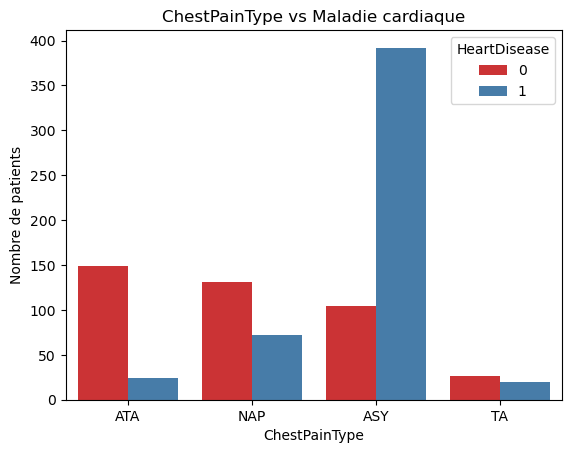

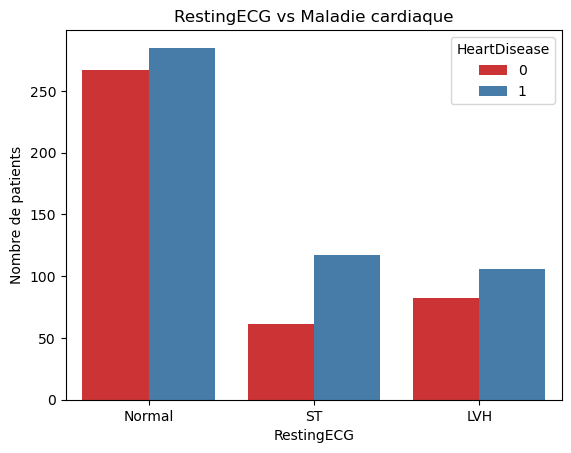

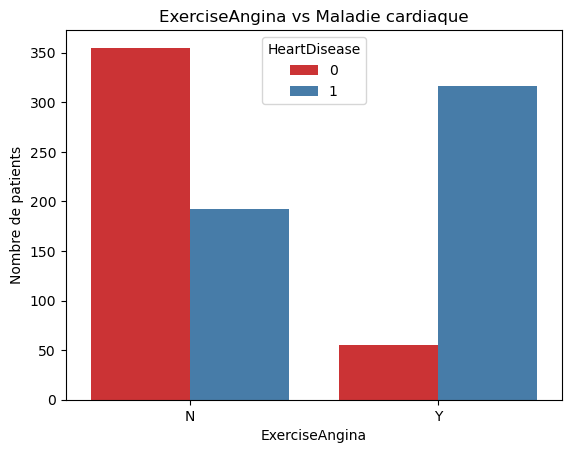

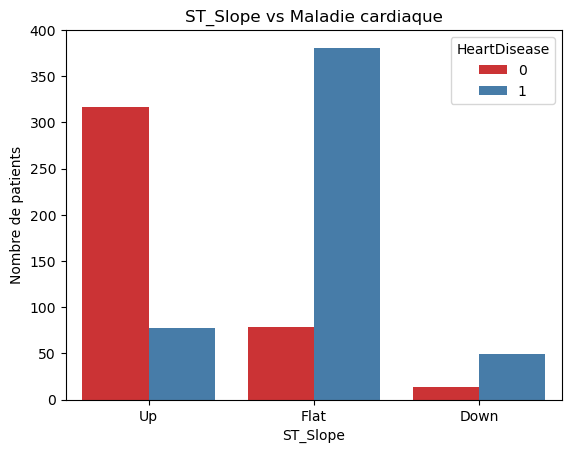

In [46]:
#ChestPainType
sns.countplot(x='ChestPainType', hue='HeartDisease', data=datheard, palette='Set1')
plt.title("ChestPainType vs Maladie cardiaque")
plt.xlabel("ChestPainType")
plt.ylabel("Nombre de patients")
plt.legend(title="HeartDisease")
plt.show()





sns.countplot(x='RestingECG', hue='HeartDisease', data=datheard, palette='Set1')
plt.title("RestingECG vs Maladie cardiaque")
plt.xlabel("RestingECG")
plt.ylabel("Nombre de patients")
plt.legend(title="HeartDisease")
plt.show()

#ExerciseAngina
sns.countplot(x='ExerciseAngina', hue='HeartDisease', data=datheard, palette='Set1')
plt.title("ExerciseAngina vs Maladie cardiaque")
plt.xlabel("ExerciseAngina")
plt.ylabel("Nombre de patients")
plt.legend(title="HeartDisease")
plt.show()

#ST_Slope
sns.countplot(x='ST_Slope', hue='HeartDisease', data=datheard, palette='Set1')
plt.title("ST_Slope vs Maladie cardiaque")
plt.xlabel("ST_Slope")
plt.ylabel("Nombre de patients")
plt.legend(title="HeartDisease")
plt.show()

In [47]:
#datheard.HeartDisease.value_counts()
print("les effectifs")
print("===============")
print("effectifs par Sex ")
print("===============")

print(datheard.Sex.value_counts())

print("effectifs par ChestPainType ")
print("===============")

print(datheard.ChestPainType.value_counts())
print("effectifs par RestingECG ")
print("===============")
#RestingECG # 
print(datheard.RestingECG.value_counts())
print("effectifs par ExerciseAngina")
print("===============")
print(datheard.ExerciseAngina.value_counts())
print("effectifs par #ST_Slope")
print("===============")
print(datheard.ST_Slope.value_counts())

les effectifs
effectifs par Sex 
Sex
M    725
F    193
Name: count, dtype: int64
effectifs par ChestPainType 
ChestPainType
ASY    496
NAP    203
ATA    173
TA      46
Name: count, dtype: int64
effectifs par RestingECG 
RestingECG
Normal    552
LVH       188
ST        178
Name: count, dtype: int64
effectifs par ExerciseAngina
ExerciseAngina
N    547
Y    371
Name: count, dtype: int64
effectifs par #ST_Slope
ST_Slope
Flat    460
Up      395
Down     63
Name: count, dtype: int64


#NORMALISATION DE DONNEES ANALYSE PREDICTIVE
 CODIFICATION DE DONNEES & ONEHOT ENCODING

In [48]:
#Codification de la variable sexe

# Nettoyage standard : conversion en string, suppression des espaces, majuscules
datheard['Sex'] = datheard['Sex'].astype(str).str.strip().str.upper()

# Codification correcte
datheard['Sex'] = datheard['Sex'].map({'M': 1, 'F': 0})

# Vérification
print(datheard['Sex'].head())


0    1
1    0
2    1
3    0
4    1
Name: Sex, dtype: int64


In [49]:
#OneHot Encoding
#liste des colonne à encoder
colonnes_encod=['ChestPainType','RestingECG','ExerciseAngina','ST_Slope']
#c
#one-Hot encoding
dt_encoded=pd.get_dummies(datheard, columns=colonnes_encod, drop_first=True)
#convertire le True/Falsa à 1/0
dt_encoded=dt_encoded.replace({True:1,False:0})

dt_encoded

C:\Users\hermanhk\AppData\Local\Temp\ipykernel_7584\1460899327.py:8: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dt_encoded=dt_encoded.replace({True:1,False:0})


,Age,Sex,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
0,40,1,140,289.0,0,172,0.0,0,1,0,0,1,0,0,0,1
1,49,0,160,180.0,0,156,1.0,1,0,1,0,1,0,0,1,0
2,37,1,130,283.0,0,98,0.0,0,1,0,0,0,1,0,0,1
3,48,0,138,214.0,0,108,1.5,1,0,0,0,1,0,1,1,0
4,54,1,150,195.0,0,122,0.0,0,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,1,110,264.0,0,132,1.2,1,0,0,1,1,0,0,1,0
914,68,1,144,193.0,1,141,3.4,1,0,0,0,1,0,0,1,0
915,57,1,130,131.0,0,115,1.2,1,0,0,0,1,0,1,1,0
916,57,0,130,236.0,0,174,0.0,1,1,0,0,0,0,0,1,0


In [50]:
#SEPARATION DES DONNEES TRAIN ET TEST X ET Y


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


# Définir X et Y
x = dt_encoded.drop("HeartDisease", axis=1)  # toutes les colonnes sauf la cible
y = dt_encoded["HeartDisease"]               # la colonne cible

# Séparation
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

#Normalisation
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.fit_transform(x_test)

pd.DataFrame(x_train)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,1.753540,0.51740,0.403985,0.027118,1.894070,0.793140,1.055374,-0.496165,-0.532181,-0.227103,0.805877,-0.496165,1.199391,1.008208,-0.874313
1,-0.817871,0.51740,-0.950506,0.027118,-0.527964,-0.924506,0.577847,-0.496165,-0.532181,-0.227103,0.805877,-0.496165,1.199391,1.008208,-0.874313
2,1.217829,-1.93274,1.487578,2.206058,-0.527964,0.558916,-0.090691,-0.496165,1.879059,-0.227103,-1.240884,-0.496165,-0.833757,-0.991859,1.143755
3,1.324972,0.51740,0.403985,-1.968062,-0.527964,-1.666216,0.100320,-0.496165,-0.532181,-0.227103,0.805877,-0.496165,1.199391,1.008208,-0.874313
4,0.574977,0.51740,0.403985,0.027118,-0.527964,-0.768356,0.100320,-0.496165,-0.532181,-0.227103,-1.240884,2.015458,1.199391,1.008208,-0.874313
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
729,0.039266,0.51740,-1.221404,-0.079320,-0.527964,-0.417019,1.819417,-0.496165,-0.532181,-0.227103,0.805877,-0.496165,1.199391,1.008208,-0.874313
730,-0.603587,0.51740,-0.137811,0.034005,-0.527964,0.910252,-0.854734,2.015458,-0.532181,-0.227103,0.805877,-0.496165,-0.833757,-0.991859,1.143755
731,0.360692,-1.93274,-0.246171,1.129475,-0.527964,0.871215,-0.854734,-0.496165,-0.532181,-0.227103,-1.240884,-0.496165,-0.833757,-0.991859,1.143755
732,1.110687,0.51740,0.078907,0.562853,-0.527964,-1.353917,2.965482,-0.496165,-0.532181,-0.227103,0.805877,-0.496165,1.199391,-0.991859,-0.874313


Epoch 1/100


c:\Users\hermanhk\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


74/74 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.5532 - loss: 0.6922 - val_accuracy: 0.5815 - val_loss: 0.6805
Epoch 2/100
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6363 - loss: 0.6667 - val_accuracy: 0.8207 - val_loss: 0.5807
Epoch 3/100
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8579 - loss: 0.5312 - val_accuracy: 0.8261 - val_loss: 0.4643
Epoch 4/100
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8557 - loss: 0.4307 - val_accuracy: 0.8207 - val_loss: 0.4126
Epoch 5/100
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8522 - loss: 0.3772 - val_accuracy: 0.8207 - val_loss: 0.3917
Epoch 6/100
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8612 - loss: 0.3577 - val_accuracy: 0.8261 - val_loss: 0.3862
Epoch 7/100
74/74 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8847 - loss: 0.3156 - val_accuracy: 0.8315 - val_loss: 0.3860
Epoch 8/100
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8455 - loss: 0.3661 - val_accuracy: 0.8315 - val_loss: 0.

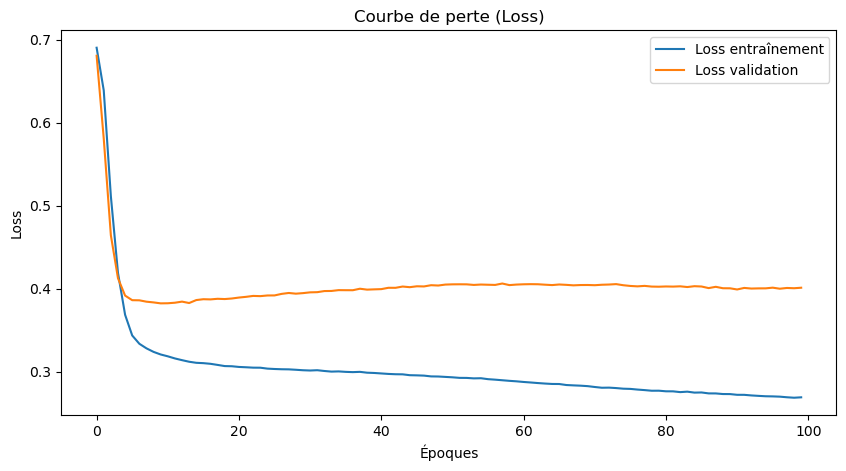

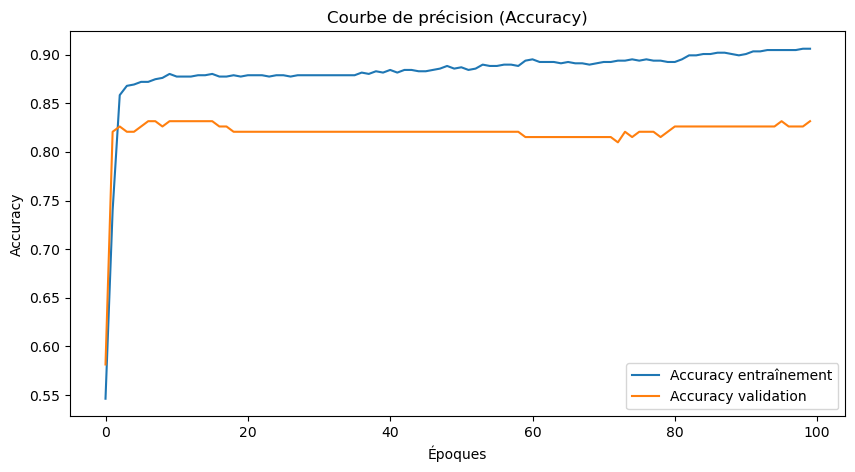

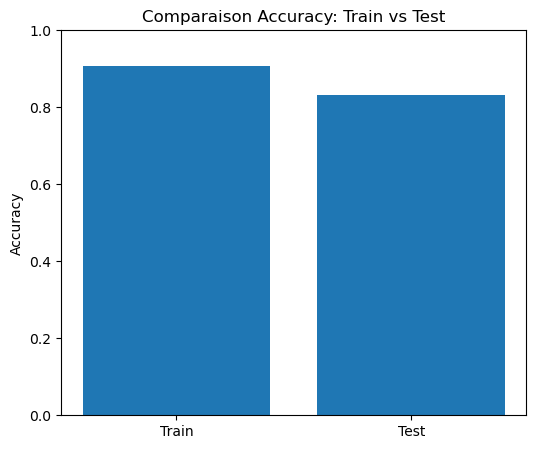

Accuracy entraînement : 0.9074
Accuracy test         : 0.8315
Perte entraînement    : 0.2664
Perte test            : 0.4012

Aperçu des 10 premières prédictions binaires sur les données de test :
[1 1 1 1 0 0 0 0 0 0]


In [51]:
# Construction, entraînement et visualisation d'un Réseau de Neurones Artificiel (RNA)
# -----------------------------------------------------------------------------
# Hypothèses :
# - Les variables x_train, x_test, y_train, y_test sont déjà définies et prêtes (numériques, après encodage et scaling si nécessaire).
# - Problème de classification binaire (sortie 0/1).
# - TensorFlow/Keras est installé et importable.
# -----------------------------------------------------------------------------

import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# -----------------------------------------------------------------------------
# 1. Construction du modèle
# -----------------------------------------------------------------------------
classifier = Sequential()

# Couche d'entrée + 1ère couche cachée
# Utilisation dynamique du nombre de variables d'entrée via x_train.shape[1]
classifier.add(Dense(units=6, kernel_initializer='uniform', activation='relu', input_dim=x_train.shape[1]))

# 2ème couche cachée
classifier.add(Dense(units=6, kernel_initializer='uniform', activation='relu'))

# Couche de sortie (binaire)
classifier.add(Dense(units=1, kernel_initializer='uniform', activation='sigmoid'))

# Compilation
classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# -----------------------------------------------------------------------------
# 2. Entraînement AVEC suivi de validation (nécessaire pour tracer val_loss / val_accuracy)
# -----------------------------------------------------------------------------
history = classifier.fit(
    x_train, y_train,
    batch_size=10,
    epochs=100,
    validation_data=(x_test, y_test),  # important pour obtenir 'val_loss' & 'val_accuracy'
    verbose=1
)

# -----------------------------------------------------------------------------
# 3. Fonctions de visualisation
# -----------------------------------------------------------------------------

def plot_loss(history):
    plt.figure(figsize=(10,5))
    plt.plot(history.history['loss'], label='Loss entraînement')
    if 'val_loss' in history.history:
        plt.plot(history.history['val_loss'], label='Loss validation')
    plt.title('Courbe de perte (Loss)')
    plt.xlabel('Époques')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()


def plot_accuracy(history):
    plt.figure(figsize=(10,5))
    # Compatibilité : certaines versions enregistrent 'accuracy', d'autres 'acc'
    acc_key = 'accuracy' if 'accuracy' in history.history else 'acc'
    plt.plot(history.history[acc_key], label='Accuracy entraînement')
    if 'val_accuracy' in history.history:
        plt.plot(history.history['val_accuracy'], label='Accuracy validation')
    elif 'val_acc' in history.history:
        plt.plot(history.history['val_acc'], label='Accuracy validation')
    plt.title('Courbe de précision (Accuracy)')
    plt.xlabel('Époques')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()


def plot_train_vs_test_score(model, x_train, y_train, x_test, y_test):
    """Compare les performances finales sur train vs test."""
    train_loss, train_acc = model.evaluate(x_train, y_train, verbose=0)
    test_loss,  test_acc  = model.evaluate(x_test,  y_test,  verbose=0)

    plt.figure(figsize=(6,5))
    plt.bar(['Train', 'Test'], [train_acc, test_acc])
    plt.title('Comparaison Accuracy: Train vs Test')
    plt.ylabel('Accuracy')
    plt.ylim(0, 1)
    plt.show()

    print(f"Accuracy entraînement : {train_acc:.4f}")
    print(f"Accuracy test         : {test_acc:.4f}")
    print(f"Perte entraînement    : {train_loss:.4f}")
    print(f"Perte test            : {test_loss:.4f}")


# -----------------------------------------------------------------------------
# 4. Prédictions + Matrice de confusion + Rapport de classification (optionnel)
# -----------------------------------------------------------------------------
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

y_prob = classifier.predict(x_test)
y_pred = (y_prob > 0.5).astype(int)

# Matrice de confusion / Rapport
cm = confusion_matrix(y_test, y_pred)
print("\nMatrice de confusion :\n", cm)
print("\nRapport de classification :\n", classification_report(y_test, y_pred))
print("Accuracy test (sklearn) :", accuracy_score(y_test, y_pred))

# -----------------------------------------------------------------------------
# 5. Appels aux fonctions de tracé
# -----------------------------------------------------------------------------
plot_loss(history)
plot_accuracy(history)
plot_train_vs_test_score(classifier, x_train, y_train, x_test, y_test)

# -----------------------------------------------------------------------------
# 6. (Option) Afficher quelques prédictions binaires
# -----------------------------------------------------------------------------
print("\nAperçu des 10 premières prédictions binaires sur les données de test :")
print(y_pred[:10].ravel())
